<a href="https://colab.research.google.com/github/YeonJin55/Implementation-of-machine-learning-algorithm-through-real-life-examples/blob/feature%2Fpractice/4%EC%A3%BC%EC%B0%A8_2_3%EC%B0%A8%EC%8B%9C_(K_Means).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb) | [Contents](Index.ipynb) | [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# In Depth: k-Means Clustering

그래프를 그리는데 사용하는 라이브러리 matplotlib과 seaborn을 임포트 합니다.

sns.set() 은 Seaborn의의 설정을 기본으로 돌려주는 코드입니다.

파이썬에서 세미콜론 ; 을 잘 사용하지는 않지만, 간단한 명령어를 여러줄에 표현하기 싫을때 사용하셔셔도 됩니다.

numpy는 고차원 행렬의 형태로 표현되는 수치형 데이터의 빠른 연산을 수행하는 라이브러리 입니다.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
print("Hello")

Hello


## Introducing k-Means

*k*-means 알고리즘은 레이블이 지정되지 않은 데이터를 *k*개의 클러스터로 구분합니다. 클러스터를 계산하는데에는 아래 관계를 활용합니다.

- 클러스터의 중심 (cluster center)은 클러스터에 속한 데이터들의 산술평균입니다.
- 각 데이터는 다른 모든 클러스터 중심보다 자신이 할당된 클러스터의 중심에 더 가깝습니다.

먼저 2차원 데이터를 생성해 보겠습니다.

생성된 네 점은 레이블이 지정되어있지만 레이블을 시각화에 사용하지는 않았습니다.


make_blobs = 임의 지정되는 중심으로부터 적정한 거리의 점들을 랜덤하게 데이터 생성

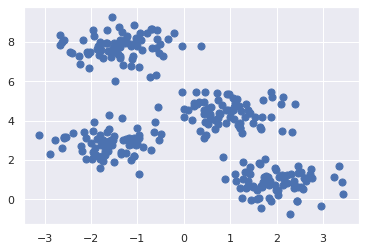

In [4]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
#cluster_std=0.60 중심으로부터 어느정도 떨어진 점들을 생성할 것인지
#random_state=0 랜덤시드 고정
#y_true에 4개의 중심점의 레이블이 표시됨.

plt.scatter(X[:, 0], X[:, 1], s=50);
#x좌표에 해당하는 점들만, y축에 해당하는 점들만 각각 전달 후, 50의 크기로 점 출력
#plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50); # 색상을 확인하고싶다면 이 코드를 사용합니다.

# 데이터의 정보를 조금 더 확인하려면?
# print(type(X))
# print(X)
# print(y_true)

In [8]:
print(type(X))
print(y_true)
#첫 번째 점이 1번 그룹에 속한다. 두 번째 점은 3번 그룹,,, 각 점이 어떤 클러스터에 속해야 하는지를 나타낸다.

<class 'numpy.ndarray'>
[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


*k*-means 알고리즘으로 클러스터를 나눠보도록 하겠습니다.

Scikit-learn 라이브러리에서 KMeans를 임포트하고 n_cluters라는 매개변수에 클러스터의 개수 k(인풋)를 전달합니다. 

fit 함수에 데이터를 담고있는 2차원 배열 X를 전달하면 클러스터링이 수행되고, 

predict 함수에 X를 전달하면 각 데이터가 어떤 클러스터에 속해야할지를 계산합니다.

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4) #kmeans 변수에 4개의 중심점을 갖는 kmeans알고리즘이 담김
kmeans.fit(X) #fit메서드 실행해 데이터를 담고 있는 X를 전달, X를 4개의 군집에 나눔.
y_kmeans = kmeans.predict(X)  #데이터 x 전달하여 fit으로 나온 결과가 어디에 매칭되어야 하는지 y_kmeans에 전달

In [12]:
print(type(y_kmeans), len(y_kmeans))
print(y_true)
print(y_kmeans)

<class 'numpy.ndarray'> 300
[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]
[0 1 3 1 0 0 2 3 1 1 2 1 3 1 0 3 3 0 2 2 0 0 3 2 2 3 0 3 2 3 1 1 3 1 1 1 1
 1 2 0 3 2 3 3 2 2 1 2 1 0 2 0 1 0 0 2 1 2 1 0 1 3 1 2 2 2 1 0 1 2 3 2 1 2
 2 1 2 3 0 1 0 3 0 0 1 3 0 3 1 1 3 0 1 2 2 3 0 0 3 2 1 0 1 0 3 0 0 3 1 3 2
 2 0 1 0 3 1 0 0 3 2 0 2 0 0 0 0 2 0 2 1 2 2 0 1 2 2 1 3 1 1 2 3 2 3 2 1 3
 1 1 1 3 1 3 0 2 1 2 0 3 1 3 3 0 3 2 2 3 0 3 3 1 0 3 2 1 0 0 3

클러스터링 결과를 시각화합니다.

동일한 클러스터에 속하는 점들이 같은 색상을 가지도록 색상 구분의 기준으로 y_kmeans를 사용하고, cmap으로 사용할 색깔을 지정합니다.

계산한 클러스터의 중심은 kmeans.cluster_centers_ 를 통해 확인할 수 있습니다.

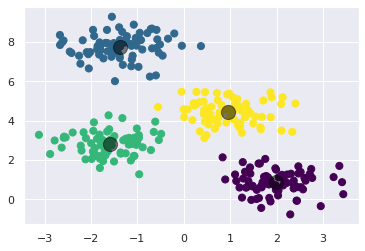

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
#c=y_kmeans 동일한 값을 가진, 즉, 동일한 군집에 속하는 점끼리 같은 색상을 칠한다.
#컬러맵=색상 지정

centers = kmeans.cluster_centers_ #전달했던 k값 가져오기
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [16]:
print(centers)

[[ 1.98258281  0.86771314]
 [-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 0.94973532  4.41906906]]


## k-Means Algorithm: Expectation–Maximization

*k*-means clustering 의 동작 방식은 Expectation–Maximization (E–M) 의 방식을 따릅니다. (최적화 하는 모델에서 주로 사용된다.)

1. 클러스터의 초기 중심을 랜덤하게 선택합니다.
2. 종료 조건을 만족할 때 까지 아래 과정을 반복합니다.
   1. 각 데이터에서 현재 클러스터 중심으로 정해진 점 중 가장 가까운 점을 찾습니다. (*E-Step*)
   2. 같은 클러스터에 속하는 데이터들의 평균으로 새 클러스터 중심을 계산합니다. (*M-Step*)
   3. 클러스터 중심 검증 후 다시 1번으로

여기서 "E-step" 은 각 데이터가 어떤 클러스터에 속해야 할지에 대한 기대치를 계산하는 단계라 생각하시면 되고, 

"M-step" 은 "E-step"에서 찾은 클러스터의 중심을 업데이트하여 클러스터에 속한 데이터에서 클러스터 중심까지의 거리를 최적화하는 단계라 생각하시면 됩니다.


![(run code in Appendix to generate image)](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.11-expectation-maximization.png?raw=1)

*k*-Means 알고리즘을 직접 구현한다면 아래와 같이 나타낼 수 있습니다.

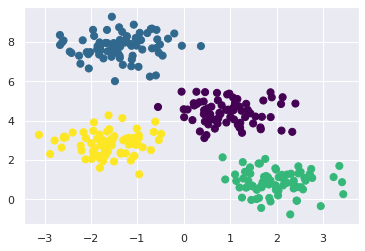

In [17]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### *k*-mean clustering 알고리즘을 사용할 때의 주의사항

#### 항상 최적의 답안 (global optimum) 을 찾아낼 수 있는것은 아닙니다.

*k*-means clustering을 포함하는 E-M 알고리즘은 매 반복시 이전 반복에 비해 더 나은 답안을 찾게 되지만, 이 과정이 꼭 최적의 답안으로 이어지는것은 아닙니다.

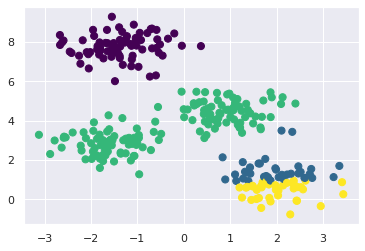

In [18]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

위 그림도 *k*-means 알고리즘의 종료조건을 만족한 답안 중 하나이지만, 올바르게 4개의 클러스터를 찾았다고 보긴 어렵습니다. 

이와같은 답안을 local optimum 이라 부릅니다.
local optimum에 빠지지 않도록 초기 값 설정 고민

#### 클러스터의 개수 *k* 를 미리 알고있어야 합니다.
알고리즘을 구동하는 과정 중 데이터를 분석하여 클러스터의 개수를 추정하는것이 아니므로 알고리즘의 구동 전 클러스터의 개수를 지정해주어야 하고, 

만일 클러스터의 개수를 잘못 추정하게된다면 알고리즘을 구동한 결과의 품질도 떨어지게 됩니다.

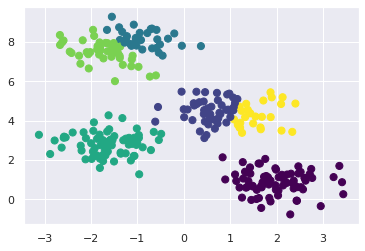

In [19]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### 클러스터를 구분하는 경계가 선형으로만 나타납니다.

데이터는 가장 가까운 클러스터 중심에 매칭된다는 속성 때문에 클러스터 중심들을 기준으로 선형으로 경계가 나뉘게 되고, 

복잡한 형태로 표현되는 데이터의 클러스터를 올바르게 찾아내지 못하게 됩니다.

In [20]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

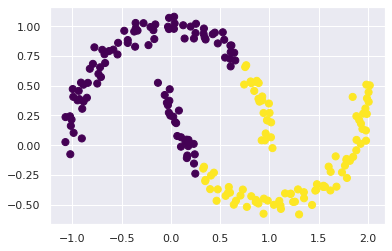

In [21]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

이런 경우를 *k*-means 알고리즘으로 해결하려면, **데이터를 고차원상의 점으로 변환**하는 과정이 필요합니다. 

데이터가 표현되는 차원을 적절히 증가시키고, 변환 과정에서 데이터의 기하적 특성을 반영한다면 충분히 선형으로 클러스터를 나누는것이 가능합니다.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


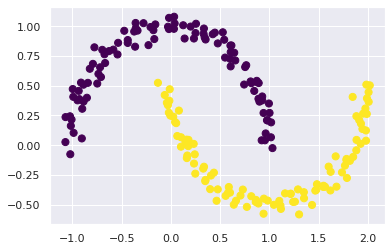

In [22]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### 데이터 숫자가 증가한다면 알고리즘의 구동 속도가 느려질 수 있습니다.
*k*-means 알고리즘은 매 반복시 모든 점이 어떤 클러스터에 속해야 하는지, 그리고 새 클러스터의 중심은 어디인지 계산합니다. 

따라서 데이터의 개수와 클러스터의 개수가 늘어나게된다면 알고리즘의 작동 시간이 이에 비례해서 증가하게됩니다.

### *k*-means 알고리즘을 활용한 색상 압축 (color compression)

아래 사진은 Scikit-Learn 에서 제공하는 샘플 이미지 중 하나입니다.

이런 이미지에는 보통 수백만개 이상의 색상이 사용되지만, 이 중 대다수의 색은 아주 유사합니다.

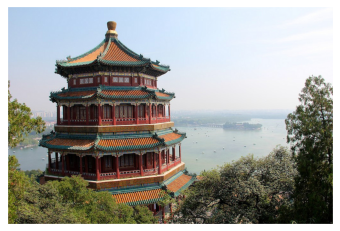

In [23]:
# Note: this requires the ``pillow`` package to be installed
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

이미지는 3차원 ndarray 로 저장됩니다.

이미지는 세로에 427개, 가로에 640개의 픽셀을 포함하고, 

각 픽셀은 RGB 각각에 대해서 0-255사이의 값을 가지고 있습니다. 

In [ ]:
print(type(china), china.shape)
print(china)

<class 'numpy.ndarray'> (427, 640, 3)
[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ...
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ...

 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ...
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ...
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ...
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]


RGB 값을 좌표로 생각한다면 각 픽셀의 색상을 3차원 공간의 점으로 표현할 수 있습니다.

픽셀들의 집합을 점 집합으로 생각한다면 가로와 세로의 구분이 필요없기에 2차원 배열로 변환하고, 

0부터 255까지의 값을 0부터 1 사이의 값으로 변환해줍니다. (normalize)

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)
print(data.shape)
print(data)

(273280, 3)
[[0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 [0.68235294 0.78823529 0.90588235]
 ...
 [0.16862745 0.19215686 0.15294118]
 [0.05098039 0.08235294 0.02352941]
 [0.05882353 0.09411765 0.02745098]]


Data에 속하는 3차원 공간에 점들을 표현한다면 그림에 포함된 점들의 클러스터 분석을 눈으로 수행해 볼 수도 있겠지만,

3차원 공간을 화면에 표현하기는 쉽지 않으므로 3개의 축 (RGB) 중 두 개를 선택하여 2차원 공간에 픽셀들을 표현해보겠습니다.

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

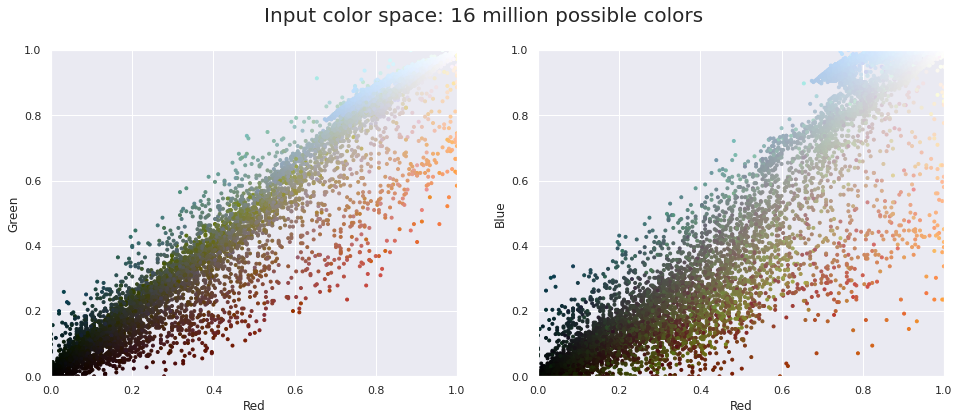

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

이제 이 점들에서 클러스터링을 수행하여 256 x 256 x 256 ~ 1677만개의 색상을 16개의 색상으로 압축해보도록 하겠습니다.

여기서는 데이터의 숫자가 많기 때문에 minibatch *k*-means 알고리즘을 사용합니다. 

minibatch *k*-means 알고리즘을 일반 *k*-means 알고리즘과 유사하게 동작하지만, 데이터의 부분집합을 대상으로 한다는 차이가 있습니다.

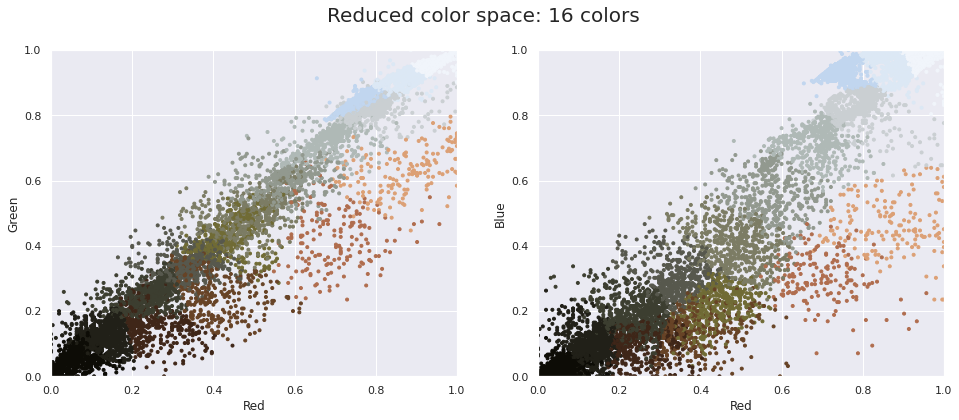

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

클러스터링을 수행한 뒤 다시한번 점들을 2차원 평면에 표현합니다. 

하지만 이번에는 점의 원래 색이 아닌, 각 데이터가 할당된 클러스터의 중심을 색상으로 사용합니다. 

클러스터의 경계가 선형이 아닌것 처럼 보이지만, 3차원 공간에서는 선형으로 나눠진 상태입니다.

색상이 변환된 픽셀로 원래 이미지를 다시 구성해보면 아래와 같습니다.

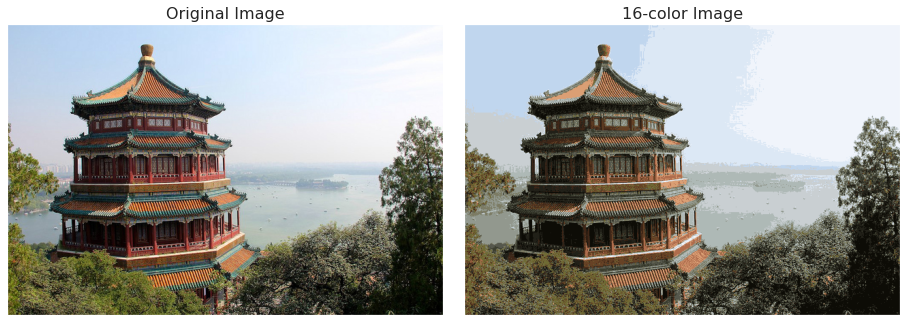

In [ ]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

확실히 정보를 잃어버리긴 했지만, 단 16개의 색상을 사용한 것 치고는 괜찮은 결과를 얻었다고 볼 수 있습니다 :)

<!--NAVIGATION-->
< [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb) | [Contents](Index.ipynb) | [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.11-K-Means.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
